In [22]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [23]:
df=pd.read_csv(r"C:\Users\Akshay\Downloads\segmentation_data.csv")

In [24]:
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [25]:
df.shape

(2000, 8)

In [26]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [27]:
import seaborn as sns

<Axes: >

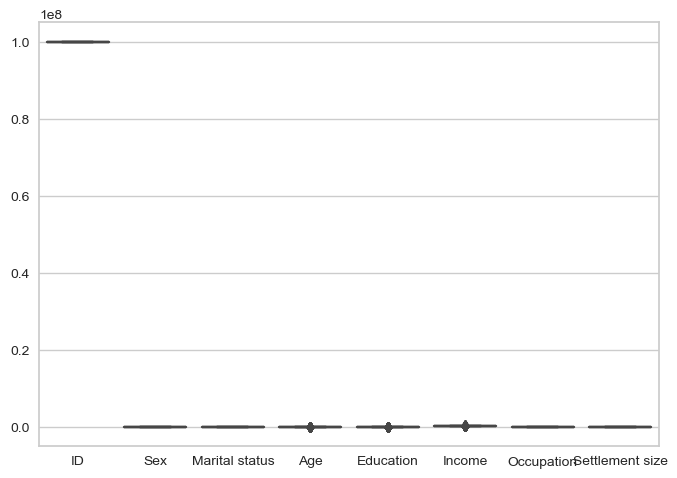

In [28]:
sns.boxplot(data=df)

In [29]:
df_final=df.copy()

In [30]:
df=df.drop('ID',axis=1)

In [31]:
df.head(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [32]:
samples=df.values

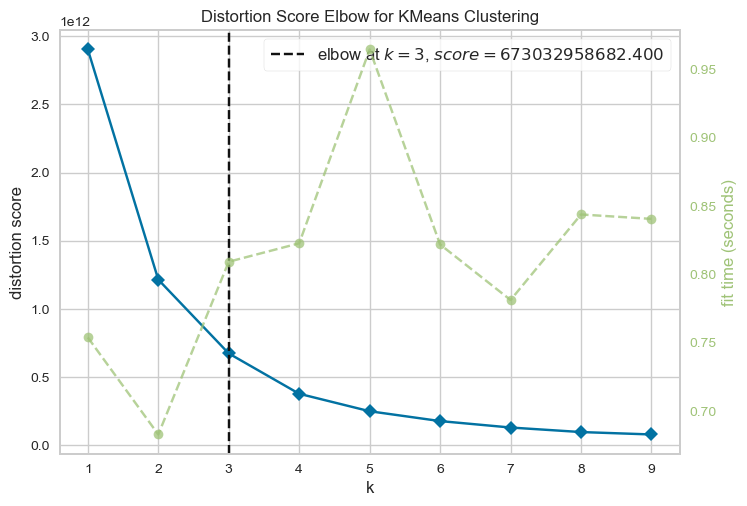

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer=KElbowVisualizer(km,k=(1,10))
visualizer.fit(samples)
visualizer.show()

In [34]:
model2=KMeans(n_clusters=3,max_iter=100,random_state=50)

In [35]:
df_final['Cluster']=model2.fit_predict(samples)
df_final.head(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,100000001,0,0,67,2,124670,1,2,2
1,100000002,1,1,22,1,150773,1,2,2
2,100000003,0,0,49,1,89210,0,0,0
3,100000004,0,0,45,1,171565,1,1,1
4,100000005,0,0,53,1,149031,1,1,2


In [36]:
df_final.Cluster.value_counts()

2    904
0    871
1    225
Name: Cluster, dtype: int64

In [19]:
Submission=df_final.loc[:,['CustomerID','Cluster']]
Submission

,CustomerID,Cluster
0,1,3
1,2,3
2,3,0
3,4,3
4,5,0
...,...,...
195,196,2
196,197,1
197,198,2
198,199,1
